## Исследование данных о российском кинопрокате



**Заказчик проекта:** Министерство культуры РФ\
\
**Задача проекта:** изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.\
`title` — название фильма;\
`puNumber` — номер прокатного удостоверения;\
`show_start_date` — дата премьеры фильма;\
`type` — тип фильма;\
`film_studio` — студия-производитель;\
`production_country` — страна-производитель;\
`director` — режиссёр;\
`producer` — продюсер;\
`age_restriction` — возрастная категория;\
`refundable_support` — объём возвратных средств государственной поддержки;\
`nonrefundable_support` — объём невозвратных средств государственной поддержки;\
`financing_source` — источник государственного финансирования;\
`budget` — общий бюджет фильма;\
`ratings` — рейтинг фильма на КиноПоиске;\
`genres` — жанр фильма.\
Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.\
Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.\
`puNumber` — номер прокатного удостоверения;\
`box_office` — сборы в рублях.

### Шаг 1. Открыть файлы с данными и объединить их в один датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [6]:
df1 = pd.read_csv(r'C:\Users\2011\practicum\01-minkult-films/minkult-films-dataset.csv')
display (df1.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
df2 = pd.read_csv(r'C:\Users\2011\practicum\01-minkult-films/minkult-films-dataset-2.csv')
display (df2)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
...,...,...
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Планирую объединить датафреймы по столбцу puNumber, но тип данных в столбце в разных датафреймах отличается. В  df тип данных столбца puNumber - object.\
Привожу этот тип данных к int64.\
При попытке преобразовать данные столбца в int64 у меня вылезла ошибка. Вместо номера прокатного удостоверения было записано 'нет'.**

**Выясняю в скольки строчках у меня отсутствует номер прокатного удостоверения.**

In [6]:
df1[df1['puNumber']=='нет']['puNumber'].count()
display (df1.query('puNumber=="нет"'))
display (df1.query('title=="Курбан-роман. (История с жертвой)"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Заменяю недостающий номер прокатного удостоверения нулём**

In [7]:
df1.loc[df1['puNumber']=='нет', 'puNumber'] = 0
display (df1.query('title=="Курбан-роман. (История с жертвой)"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Теперь я могу поменять тип столбца 'puNumber' на 'int64'**

In [8]:
df1['puNumber'] = df1['puNumber'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Объединяю датафреймы df1 и df2.**

In [9]:
df = pd.merge(df1, df2, on='puNumber', how='outer')
df.info()
display (df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

**Необходимо изменить тип данных в следующих столбцах:\
'show_start_date' из object в datetime\
'rating' в float**

In [10]:
df['show_start_date'] = pd.to_datetime (df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Не удается перевести столбец ratings в формат float. Изучаю подробнее столбец. В столбце я обнаружила рейтинг фильма в процентах. Исправляю это.**

- Обнанаружила в столбце "рейтинг" значения типа "99%". Убираю значек процента и перевожу тип данных столбца в float.

In [11]:
df['ratings'].unique()
df['ratings'] = df['ratings'].str.replace("%", "")
df['ratings'] = df['ratings'].astype('float')

- Ниже пишу функцию, чтобы исправить некорректный рейтинг. Вместо "99" и подобных значений пишу "9.9"

In [12]:
def ratings_percent (row):
    if row >10:
        row = row/10
        return row
df['ratings'] = df['ratings'].apply(ratings_percent)
df['ratings'].unique()

array([nan, 9.9, 2.8, 9.7, 8.3, 6.4, 9.1, 9.4, 6.2, 7.9, 9. , 1.9, 8.8,
       8.9, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.

Начинаю искать пропущенные значения. Вывожу на экран сумму пропусков в каждом столбце.

In [13]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                  7457
genres                    976
box_office               4328
dtype: int64

**В столбцах refundable_support, nonrefundable_support, financing_source, box_office пропуски поскольку, это были фильмы без финансовой поддержки государства. Если я заполню пропуски нулями, то данные сильно исказятся в сторону нуля.\
\
Заполняю в столбце "бюджет" пропуски нулями.\
\
Ниже я заполнить пропущенные значения нулями, где 0 означает отсутствие господдержки или отсутствие сведений о бюджете**

In [14]:
df['budget'] = df['budget'].fillna(0)
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['financing_source'] = df['financing_source'].fillna(0)
df['box_office'] = df['box_office'].fillna(0)

In [15]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                  7457
genres                    976
box_office                  0
dtype: int64

**Пропуски в столбцах box_office, refundable_support, nonrefundable_support, budget, financing_source возникли, поскольку изначально были сведения только о части фильмов.\
Пропуски в столбцах film_studio, production_country, director, producer, ratings, genres - возникли, вероятно, из-за человеческого фактора. Данные сведения не были внесены в карточку фильма.\
\
Пропуски в столбцах film_studio, production_country, director, producer, genres - не заполняю. У меня нет этих сведений, я не могу их рассчитать, поэтому оставляю пропусками**

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Ищу явные дубликаты в данных**

In [16]:
print (df.duplicated().sum())

0


**Ищу неявные дубликаты в столбце title. Убираю пробелы в начале и конце строки.**

In [17]:
#df['title'].unique() #закомментила, потому что вывод получается слишком длинный
df['title'] = df['title'].str.strip()

**Ищу и исправляю неявные дубликаты в столбце type**

In [18]:
df['type'].unique()
df['type'] = df['type'].str.replace(" Художественный", "Художественный")
df['type'] = df['type'].str.replace(" Анимационный", "Анимационный")
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Ищу неявные дубликаты в столбце film_studio. Убираю пробелы в начале и конце строки.**

In [19]:
#df['film_studio'].unique() #закомментила, потому что вывод получается слишком длинный
df['film_studio'] = df['film_studio'].str.strip()

**Ищу и исправляю неявные дубликаты в столбце production_country**

In [20]:
df['production_country'].unique()
df['production_country'] = df['production_country'].str.replace(" ", "")
df['production_country'] = df['production_country'].str.replace(",", "-")
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР-Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'НоваяЗеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия-Казахстан-США', 'СССР-Швеция',
       'СССР-Франция-Англия-Куба-ГДР', 'Германия',
       'Великобритания-США-Германия-КНР', 'СССР-ЧССР-ЗападныйБерлин-ПНР',
       'СССР-Италия', 'Гонконг-КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР-Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'НоваяЗеландия-США

**Ищу неявные дубликаты в столбце director. Убираю пробелы в начале и конце строки.**

In [21]:
df['director'].unique()
df['director'] = df['director'].str.replace('Николас Виндинг Рефн                                                                                                                                                                                                                             ', "Николас Виндинг Рефн")
df['director'] = df['director'].str.strip()
#df['director'].unique()

**Ищу неявные дубликаты в столбце producer. Убираю пробелы в начале и конце строки.**

In [22]:
#df['producer'].unique()
df['producer'] = df['producer'].str.strip()

**Ищу неявные дубликаты в столбце genres. Убираю пробелы в начале и конце строки.**

In [23]:
#df['genres'].unique()
df['genres'] = df['genres'].str.strip()

In [59]:
#Код ревьюера
df[df['puNumber'].duplicated(keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start,head_genre,head_director,share_support_%,payback_%,sum_support
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,NaN,"мелодрама,комедия",0.00,2010,мелодрама,Эрик Лартиго,NaN,NaN,0.00
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия-Великобритания-Италия-Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,NaN,"драма,мелодрама,история",0.00,2010,драма,Зенке Вортманн,NaN,NaN,0.00
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,NaN,"комедия,криминал",0.00,2010,комедия,ХЭрольд Рэмис,NaN,NaN,0.00
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,0,NaN,"комедия,криминал",0.00,2010,комедия,Гарольд Реймис,NaN,NaN,0.00


#### Шаг 2.5. Проверяю количественные значения

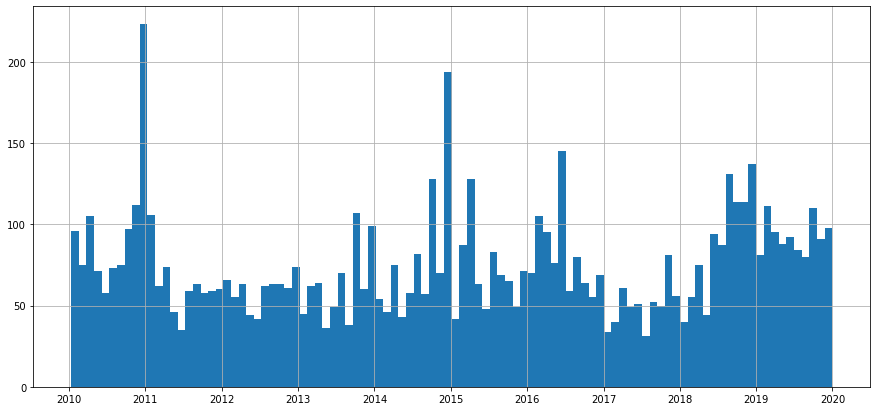

In [24]:
df['show_start_date'].hist(figsize=(15, 7), bins=100)
None

- В столбце 'refundable_support' огромный пик около нуля. Я отсортировала по значениям больше нуля, чтобы рассмотреть остальные значения подробнее

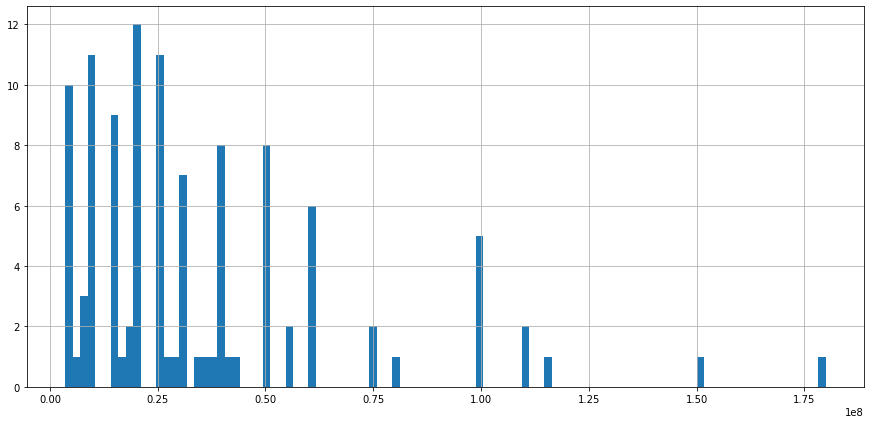

In [25]:
df_refundable = df.query('refundable_support > 0')
df_refundable['refundable_support'].hist(figsize=(15, 7), bins=100)
None

<AxesSubplot:>

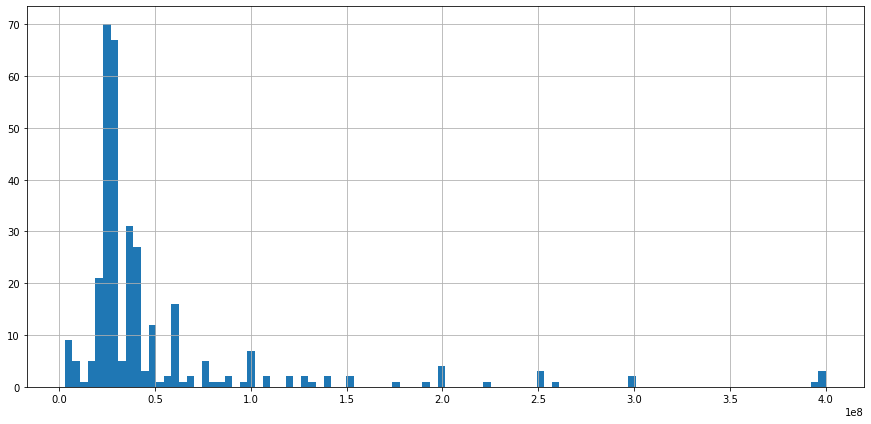

In [26]:
df_nonrefundable = df.query ('nonrefundable_support >0')
df_nonrefundable['nonrefundable_support'].hist(figsize=(15, 7), bins=100)

<AxesSubplot:>

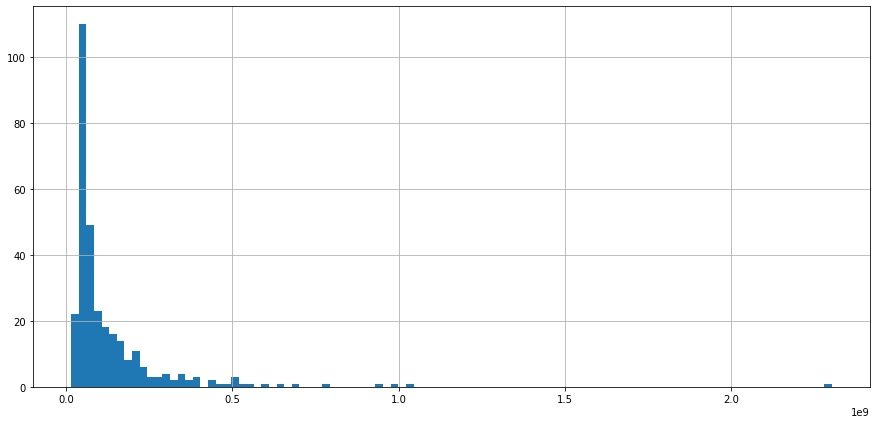

In [27]:
df_budget = df.query('budget >0')
df_budget['budget'].hist(figsize=(15, 7), bins=100)

<AxesSubplot:>

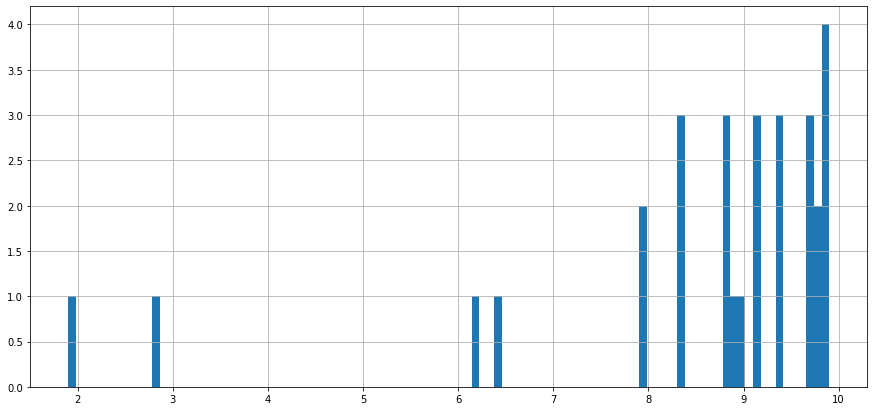

In [28]:
df['ratings'].hist(figsize=(15, 7), bins=100)

- В столбце 'box_office' огромный пик около нуля. Я отсортировала по значениям больше нуля, чтобы рассмотреть остальные значения подробнее

<AxesSubplot:>

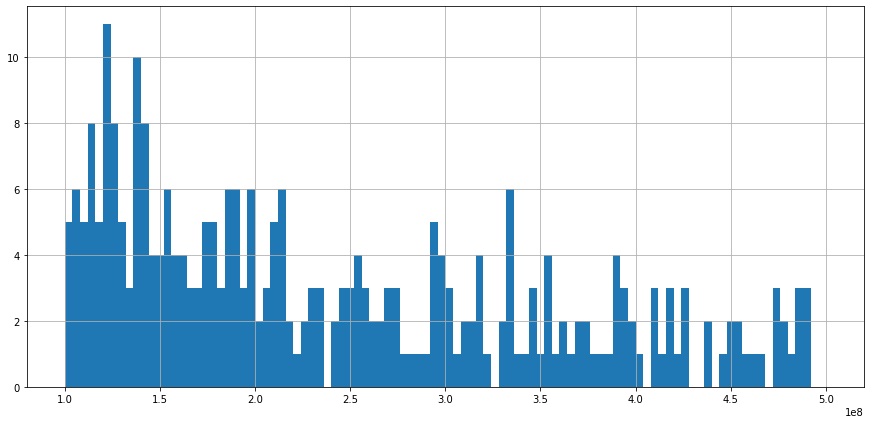

In [29]:
df['box_office'].hist(figsize=(15, 7), bins=100, range=(100000000,500000000))
#df['box_office'].hist(figsize=(15, 7), bins=100)

Столбец **show_start_date** указывает на даты премьер фильмов. Больше всего премьер было в 2010 году, а меньше всего - между 2017 и 2018 годами.\
\
Значения столбца **refunduble_support (возвратная поддержка государства)**  колеблются между 5 млн. руб и 75 млн. руб. Есть отдельные выбросы вплоть до 200 млн. руб.\
\
Значения столбца **nonrefundable_support (не возвратная поддержка)** колеблются между 10 млн. руб и 150 млн. руб. с отдельными выбросами вплоть до 400 млн. руб. Это очень странно, что не возвратная поддержка государства больше, чем возвратная. Выглядит как откровенная коррупционная составляющая.\
\
Бюджет большинства проектов в столбце **budget** составляет примерно 50 млн. руб. Бюджет основной массы проектов колеблется между 10 млн. руб. и 500 млн. руб., с отдельными выбросами вплоть до 3 млрд. руб.\
\
Столбец **ratings** не соответствует нормальному распределению Пуассона. Пик на значении рейтинга около 10 баллов. Это выглядит странно. И почему-то практически нет значений в промежутке от 3 до 6 баллов.\
\
В диаграмме столбца **box_office (сборы в рублях)** есть пик на нуле, но это понятно, т.к. большинство значений данного столбца - нули. Где 0 - это отсутствие сведений о бюджете. Чтобы изучить столбец подробнее, я убрала нулевые значения. Основная масса сборов в рублях колеблется в промежутке до 500 млн. руб. с пиком на значении около 125 млн. руб. Есть отдельные выбросы вплоть до 3 млрд. руб.

**Изучаю подробнее столбец refundable_support**

In [30]:
df.query('refundable_support > 0').sort_values(by='refundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2982,Сдается дом со всеми неудобствами,111008016,2016-04-27 12:00:00+00:00,Художественный,"ФГУП ""Киноконцерн ""Мосфильм"", ООО ""Киностудия ...",Россия,В.Сторожева,"К.Шахназаров, С.Говорухин",«12+» - для детей старше 12 лет,"3,500,000.00","20,000,000.00","69,428,728.00",Фонд кино,NaN,комедия,"55,800.00"
5932,Проводник,111006518,2018-11-29 12:00:00+00:00,Художественный,"ЗАО ""Мотор фильм студия""",Россия,И.Максимов,"М.Курбатов, Г.Подземельный, Д.Фикс",«16+» - для детей старше 16 лет,"5,000,000.00","35,000,000.00","62,000,000.00",Фонд кино,NaN,"ужасы,триллер","22,730,244.88"
3230,Невеста .,111016516,2016-10-25 12:00:00+00:00,Художественный,"ООО ""Форс Медиа""",Россия,С.Подгаевский,"В.Северцев, Д.Литвинов, З.Болотаев",«16+» - для детей старше 16 лет,"5,000,000.00","20,000,000.00","50,000,000.00",Фонд кино,NaN,"ужасы,триллер","175,799,581.00"
3041,30 свиданий,111020815,2015-12-10 12:00:00+00:00,Художественный,"ООО ""Инспирейшн Филмс""",Россия,Т.Игуменцева,"Д.Литвинов, Д.Осмеркин, А.Гавриш, А.Агеев",«16+» - для детей старше 16 лет,"5,000,000.00","20,000,000.00","48,661,150.00",Фонд кино,NaN,"комедия,мелодрама","85,405,423.61"
7375,Тварь,111019419,2019-11-26 12:00:00+00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+» - для детей старше 16 лет,"5,000,000.00","35,000,000.00","78,422,212.00",Фонд кино,NaN,"триллер,драма","18,617,156.96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,NaN,"фэнтези,комедия,семейный","511,775,548.00"
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ""...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,"110,000,000.00","30,000,000.00","222,177,790.00","Министерство культуры, Фонд кино",NaN,"мюзикл,боевик,драма","81,430,626.82"
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"115,000,000.00",0.00,"185,500,705.00",Фонд кино,NaN,"мультфильм,приключения,семейный","577,368,853.25"
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,NaN,драма,"364,285,139.60"


Минимальный размер возвратного бюджетного финансирования - 3,5 млн. рублей, а максимальный - 180 млн. рублей.

**Строю диаграмму распределения к столбцу refundable_support. Для описания данных фильтрую столбец refundable_support по значениям, которые больше нуля.**

            puNumber  refundable_support  nonrefundable_support  \
count         111.00              111.00                 111.00   
mean  111,577,412.18       35,486,486.49          59,847,104.04   
std     1,177,059.84       31,972,875.36          76,527,609.95   
min   111,000,116.00        3,500,000.00                   0.00   
25%   111,006,818.00       15,000,000.00          23,677,000.00   
50%   111,013,619.00       25,000,000.00          35,000,000.00   
75%   111,021,869.00       50,000,000.00          60,000,000.00   
max   114,010,018.00      180,000,000.00         400,000,000.00   

                budget  ratings       box_office  
count           111.00     0.00           111.00  
mean    197,157,745.51      NaN   231,479,108.01  
std     279,235,614.53      NaN   444,844,404.83  
min               0.00      NaN             0.00  
25%      69,118,977.00      NaN    18,631,341.31  
50%     120,000,000.00      NaN    72,578,317.40  
75%     217,629,245.50      NaN   235,4

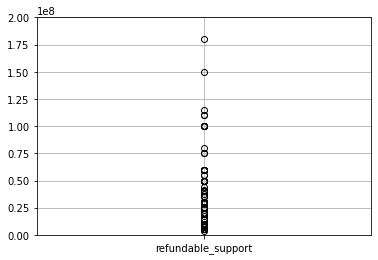

In [31]:
plt.ylim(0, 200000000)
df.boxplot(column=['refundable_support'])
#df.query('refundable_support > 0').plot(y='refundable_support', grid=True, figsize=(20, 5), style='o-')
None

print (df.query('refundable_support > 0').describe())

Из данных видно, что медианный размер поддержки государства (столбец refundable_support) составляет 35 млн. руб. Т.е. распределение возвратной государственной поддержки: от 15 млн. до 50 млн. руб.

**Изучаю подробнее столбец nonrefunduble_support**

In [32]:
df.query('nonrefundable_support > 0').sort_values(by='nonrefundable_support')
print (df.query('nonrefundable_support > 0').describe())

            puNumber  refundable_support  nonrefundable_support  \
count         323.00              323.00                 323.00   
mean  111,573,030.93       10,712,074.30          50,345,784.25   
std     5,775,433.81       23,719,086.89          60,243,206.31   
min   111,000,115.00                0.00           3,000,000.00   
25%   111,004,867.00                0.00          25,000,000.00   
50%   111,010,319.00                0.00          30,000,000.00   
75%   111,017,367.50       10,000,000.00          45,000,000.00   
max   214,010,116.00      180,000,000.00         400,000,000.00   

                budget  ratings       box_office  
count           323.00     2.00           323.00  
mean    126,732,173.13     9.20   122,973,950.32  
std     190,286,996.71     0.28   329,446,710.80  
min               0.00     9.00             0.00  
25%      41,999,492.00     9.10       830,673.00  
50%      68,294,200.00     9.20    11,298,281.10  
75%     139,454,357.00     9.30    99,2

Минимальный размер невозвратного бюджетного финансирования - 3 млн. рублей, а максимальный - 400 млн. рублей.\
Медианный размер невозвратного бюджетного финансирования - 30 млн. руб., и распределение колеблется от 25 млн. до 40 млн. руб.

**Изучаю подробнее столбец budget**

            puNumber  refundable_support  nonrefundable_support  \
count         315.00              315.00                 315.00   
mean  111,568,271.31       11,603,174.60          48,107,043.96   
std     5,844,829.21       25,151,438.82          59,886,140.86   
min   111,000,115.00                0.00                   0.00   
25%   111,004,815.50                0.00          25,000,000.00   
50%   111,010,219.00                0.00          30,000,000.00   
75%   111,017,167.50       10,000,000.00          40,000,000.00   
max   214,010,116.00      180,000,000.00         400,000,000.00   

                budget  ratings       box_office  
count           315.00     2.00           315.00  
mean    134,096,082.35     9.20   124,889,446.25  
std     191,226,039.63     0.28   332,638,242.71  
min      14,462,464.00     9.00             0.00  
25%      46,153,866.50     9.10       770,654.00  
50%      73,379,554.00     9.20    11,011,814.30  
75%     150,004,286.50     9.30    96,9

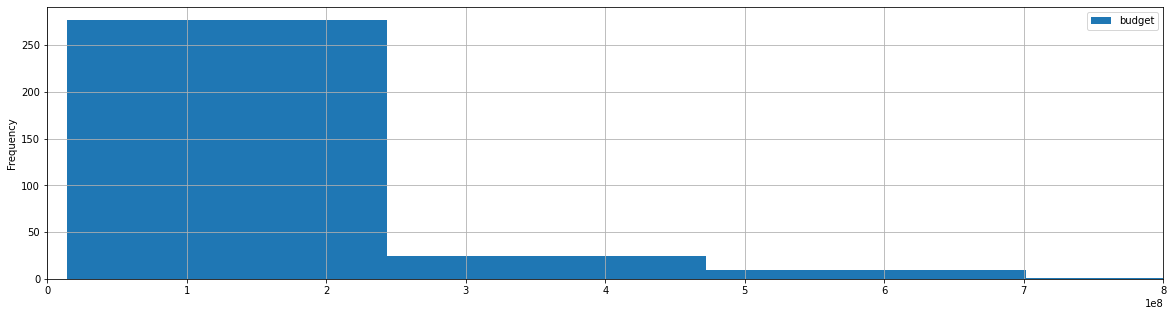

In [33]:
df.query('budget > 0').sort_values(by='budget')
print (df.query('budget > 0').describe())
df.query('budget > 0').plot(y='budget', grid=True, figsize=(20, 5), style='o-', kind='hist', xlim=(0,800000000))
None

Бюджет большей части фильмов колеблется от 46 млн. руб. до 150 млн. руб. Медианный размер бюджета фильма - 130 млн. руб.

**Изучаю подробнее столбец box_office (сборы в рублях)**

            puNumber  refundable_support  nonrefundable_support  \
count       3,134.00            3,134.00               3,134.00   
mean  120,217,553.59        1,212,188.90           4,949,638.90   
std    12,415,227.25        8,679,587.20          23,557,507.49   
min   111,000,113.00                0.00                   0.00   
25%   114,000,115.25                0.00                   0.00   
50%   121,013,212.50                0.00                   0.00   
75%   121,028,390.25                0.00                   0.00   
max   224,026,410.00      180,000,000.00         400,000,000.00   

                budget  ratings       box_office  
count         3,134.00    14.00         3,134.00  
mean     12,950,277.01     7.83    77,064,365.82  
std      70,742,747.26     2.49   241,178,383.77  
min               0.00     1.90            40.00  
25%               0.00     8.00       101,028.75  
50%               0.00     8.80     2,409,099.35  
75%               0.00     9.30    24,5

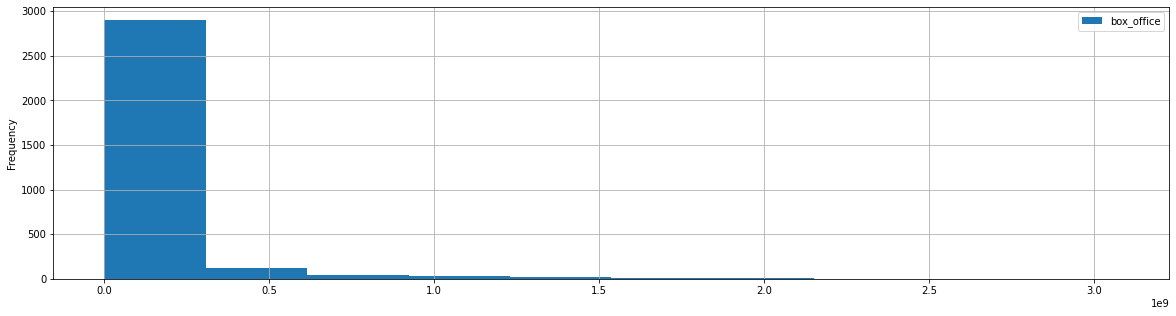

In [34]:
df.query('box_office > 0').sort_values(by='box_office')
df.query('box_office > 0').plot(y='box_office', grid=True, figsize=(20, 5), style='o-', kind='hist')
print (df.query('box_office > 0').describe())
None

Медианный размер сборов с показов фильма составляет 2,4 млн. руб. и колеблется от 100 тыс. до 24 млн. рублей.\
Сведений о размере сборов с показов фильма очень мало - около 300 строк. Необходимо больше информации для более подробных выводов.\
\
Разница между медианным и средним размером сборов с показов фильмов отличается в сотни раз. Это говорит о том, что наблюдается большой разброс значений. Что отдельные выбросы - слишком высокие значения в столбце **box_office** - искажают картину.

**Проверяю столбец budget на то, чтобы размер государственной поддержки не превышал общий бюджет проекта**

In [36]:
df['budget'] = df['budget'].fillna(0)
df.query('budget < (nonrefundable_support + refundable_support)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",NaN,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,NaN,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,NaN,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,NaN,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,NaN,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,NaN,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,NaN,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,NaN,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,NaN,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,NaN,фантастика,"1,038,321,489.00"


- я обнаружила столбцы, в которых бюджет указан 0, но есть государственная поддержка. Ниже я пишу функцию, чтобы заполнить пропущенные столбцы с бюджетом. В пропущенные столбцы с бюджетом пишу сумму государственной поддержки.

In [37]:
def budget_pass (row):
    nonrefundable_support = row['nonrefundable_support']
    refundable_support = row['refundable_support']
    budget = row['budget']
    if budget < (nonrefundable_support + refundable_support):
        budget = nonrefundable_support + refundable_support
        return budget
df['budget'] = df.apply(budget_pass, axis=1)

- Проверяю ниже как работает функция.

In [38]:
display (df[df['puNumber']==114002419])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"60,000,000.00","120,000,000.00","180,000,000.00",Фонд кино,NaN,"мультфильм,комедия,приключения","147,606,826.51"


**Вывод по разделу**\
\
В разделе я проверяла количественные значения столбцов.\
Минимальный размер возвратного бюджетного финансирования **refunduble_support (возвратная поддержка государства)** - 3,5 млн. рублей, а максимальный - 180 млн. рублей\
\
Из данных видно, что медианный размер поддержки государства **(столбец refundable_support)** составляет 35 млн. руб. Т.е. распределение возвратной государственной поддержки: от 15 млн. до 50 млн. руб.\
\
Минимальный размер невозвратного бюджетного финансирования **nonrefundable_support (не возвратная поддержка)** - 3 млн. рублей, а максимальный - 400 млн. рублей.
Медианный размер невозвратного бюджетного финансирования - 30 млн. руб., и распределение колеблется от 25 млн. до 40 млн. руб. Это очень странно, что не возвратная поддержка государства больше, чем возвратная.\
\
Бюджет большей части фильмов в столбце **budget** колеблется от 46 млн. руб. до 150 млн. руб. Медианный размер бюджета фильма - 130 млн. руб.\
\
В столбце **box_office (сборы в рублях)**:\
Медианные сборы:  2409099.36\
Средние сборы:  77064365.82\
\
Медианный размер сборов с показов фильма составляет 2,4 млн. руб. и колеблется от 100 тыс. до 24 млн. рублей.
Сведений о размере сборов с показов фильма очень мало - около 300 строк. Необходимо больше информации для более подробных выводов.\
\
Разница между медианным и средним размером сборов с показов фильмов отличается в сотни раз. Это говорит о том, что наблюдается большой разброс значений. Что отдельные выбросы - слишком высокие значения в столбце box_office - искажают картину.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [39]:
df['year_start'] = df['show_start_date'].dt.year
display (df['year_start'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: year_start, Length: 7486, dtype: int64

In [40]:
df['head_genre'] = df['genres'].str.split(",").str[0]
display (df[['head_genre', 'genres']].head(5))
df['head_director'] = df['director'].str.split(",").str[0]
display (df[['head_director', 'director']].head(5))

,head_genre,genres
0,боевик,"боевик,драма,мелодрама"
1,драма,"драма,военный"
2,фантастика,"фантастика,боевик,триллер"
3,фантастика,"фантастика,боевик,триллер"
4,фантастика,"фантастика,боевик,триллер"


,head_director,director
0,Кевин Костнер,Кевин Костнер
1,Е.Матвеев,Е.Матвеев
2,Тимур Бекмамбетов,Тимур Бекмамбетов
3,Тимур Бекмамбетов,Тимур Бекмамбетов
4,Тимур Бекмамбетов,Тимур Бекмамбетов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
df['share_support_%'] = (df['refundable_support'] + df['nonrefundable_support'])*100/df['budget']
display (df[df['budget']>0].head(3))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start,head_genre,head_director,share_support_%
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","23,000,000.00","Министерство культуры, Фонд кино",NaN,мелодрама,"10,234,016.10",2014,мелодрама,А.Зайцев,100.00
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","75,000,000.00",Фонд кино,NaN,драма,"446,163,511.00",2015,драма,Р.Прыгунов,100.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","80,000,000.00",Фонд кино,NaN,"боевик,драма,криминал","196,572,438.40",2015,боевик,А.Андрианов,100.00


- Добавляю столбец с расчетом окупаемости фильма

In [42]:
df['payback_%'] = df['box_office']/df['budget']*100
display (df.query('box_office > 0 and budget >0').head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start,head_genre,head_director,share_support_%,payback_%
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","23,000,000.00","Министерство культуры, Фонд кино",NaN,мелодрама,"10,234,016.10",2014,мелодрама,А.Зайцев,100.00,44.50
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","75,000,000.00",Фонд кино,NaN,драма,"446,163,511.00",2015,драма,Р.Прыгунов,100.00,594.88
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","80,000,000.00",Фонд кино,NaN,"боевик,драма,криминал","196,572,438.40",2015,боевик,А.Андрианов,100.00,245.72
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"20,000,000.00",Фонд кино,NaN,"комедия,фэнтези","67,418,974.80",2015,комедия,Д.Штурманова,100.00,337.09
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","160,000,000.00",Фонд кино,NaN,"мультфильм,приключения,фэнтези","184,487,551.40",2015,мультфильм,М.Фадеев,100.00,115.30


**Добавила в датафрейм новые столбцы: основной жанр, главный режиссер, год проката, доля государственной поддержки в фильме, расчет окупаемости фильма**

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Cмотрю сколько фильмов выходило в прокат каждый год**

In [43]:
df_year = df.groupby('year_start', sort=False).count()
display (df_year['title'].sort_values())
display (df_year['title'])

year_start
2017    505
2012    593
2011    622
2013    630
2015    705
2014    807
2016    818
2018    891
2019    930
2010    985
Name: title, dtype: int64

year_start
2015    705
2016    818
2013    630
2014    807
2012    593
2017    505
2010    985
2011    622
2018    891
2019    930
Name: title, dtype: int64

Меньше всего фильмов выходило в 2017 году, а больше всего - в 2010 году.

**Информация о сборах фильма указана в столбце box_office. Считаю какую долю составляют фильмы с указанной информацией о сборах**

In [44]:
box_office = df[df['box_office']>0]['title'].count()
title = df['title'].count()
percent_box_office = box_office*100/title
print ('Информация о сборах фильма есть у', round(percent_box_office, 2), '% фильмов')

Информация о сборах фильма есть у 41.86 % фильмов


In [45]:
box_office = df[df['box_office']>0]
box_office = box_office.groupby('year_start')
box_office_sum = box_office['box_office'].sum().sort_values()
display (box_office_sum)

year_start
2010        2,428,654.00
2012        6,955,423.00
2011       14,102,765.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2019   48,425,708,779.59
2017   48,563,707,217.51
2018   49,668,403,134.32
Name: box_office, dtype: float64

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [46]:
df_year_box = df.groupby('year_start')
df_year_box_sum = df_year_box['box_office'].sum().sort_values()
display (df_year_box_sum)

year_start
2010        2,428,654.00
2012        6,955,423.00
2011       14,102,765.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2019   48,425,708,779.59
2017   48,563,707,217.51
2018   49,668,403,134.32
Name: box_office, dtype: float64

Минимальная сумма сборов была в 2010 году, а максимальная - в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**Считаю медианную сумму сборов для каждого года**

In [47]:
box_office_median_year = df.query('box_office > 0').pivot_table(index='year_start',\
                                                                values='box_office', aggfunc='median').reset_index()

**Считаю среднюю сумму сборов для каждого года**

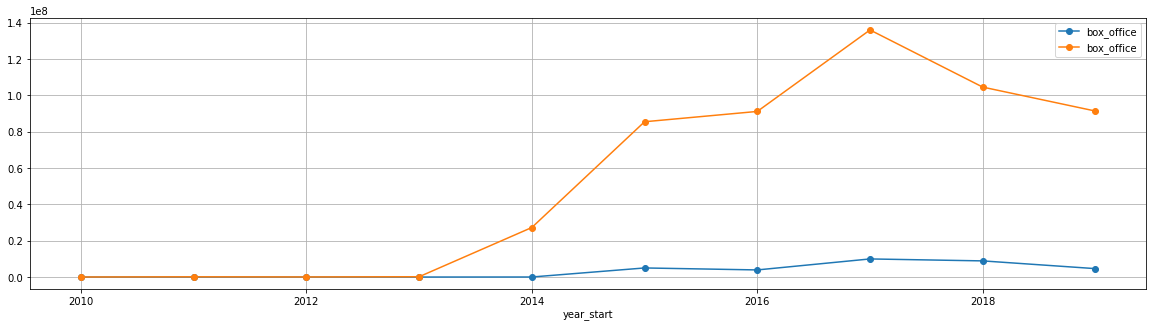

In [48]:
box_office_mean_year = df.query('box_office > 0').pivot_table(index='year_start', \
                                                              values='box_office').reset_index()
ax = box_office_median_year.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
box_office_mean_year.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-', ax=ax)
None

Пик сборов за фильмы произошел в 2017 году и с тех пор плавно снижается.

**Вывожу сводную таблицу, в которой указываю год, медианные сборы, средние сборы**

In [49]:
df_pivot3 = pd.merge(box_office_median_year, box_office_mean_year, on='year_start', how='outer')
df_pivot3 = df_pivot3.rename(columns={'box_office_x': 'box_office_median', 'box_office_y': 'box_office_mean'}) 
display (df_pivot3)

,year_start,box_office_median,box_office_mean
0,2010,"1,710.00","24,046.08"
1,2011,"3,000.00","129,383.17"
2,2012,"6,220.00","56,548.15"
3,2013,"3,580.00","166,478.81"
4,2014,"20,400.00","27,270,885.93"
5,2015,"5,003,450.15","85,492,132.46"
6,2016,"3,915,041.02","91,173,904.27"
7,2017,"9,968,340.00","136,032,793.33"
8,2018,"8,891,102.21","104,565,059.23"
9,2019,"4,627,798.34","91,369,261.85"


**Огромная разница между средним значением и медианой. На среднее значение сильно влияют экстремально высокие сборы в рублях за некоторые фильмы**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**Строю график зависимости сборов фильма от возрастного ограничения аудитории**

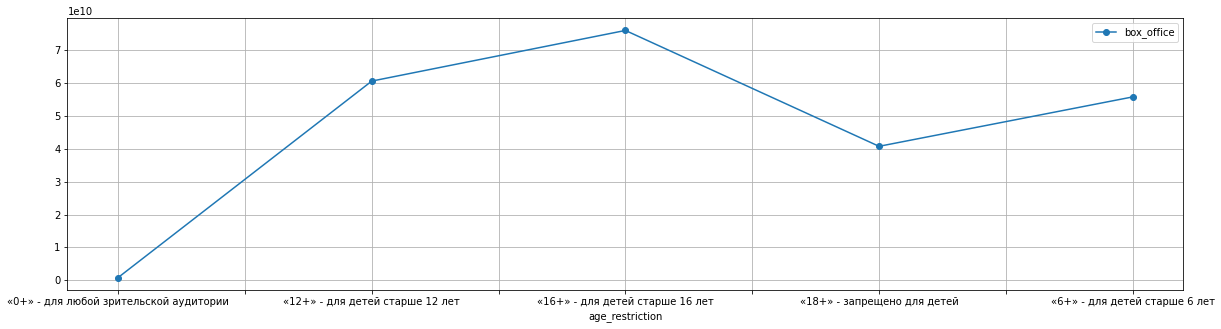

In [50]:
age_restriction_pivot = df.query('year_start >= 2015').pivot_table (index='age_restriction', values='box_office', \
                                                                    aggfunc='sum').reset_index()
age_restriction_pivot.plot(x='age_restriction', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Возрастное ограничение влияет на сборы фильма. Самые высокие сборы у фильмов 16+**

**Строю график зависимости сборов фильмов категории 0+ по годам**

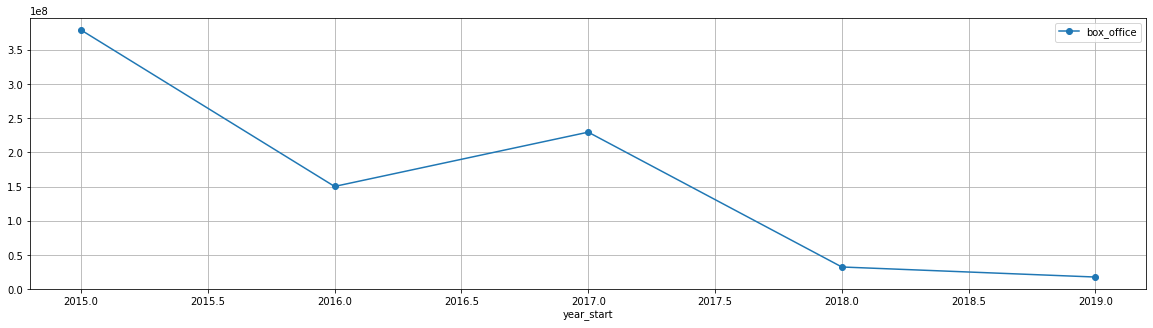

In [51]:
age_restriction_pivot0 = df.query('age_restriction == "«0+» - для любой зрительской аудитории" \
and year_start >=2015').pivot_table(index='year_start', values='box_office', aggfunc='sum').reset_index()
age_restriction_pivot0.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Строю график зависимости сборов фильмов категории 6+ по годам**

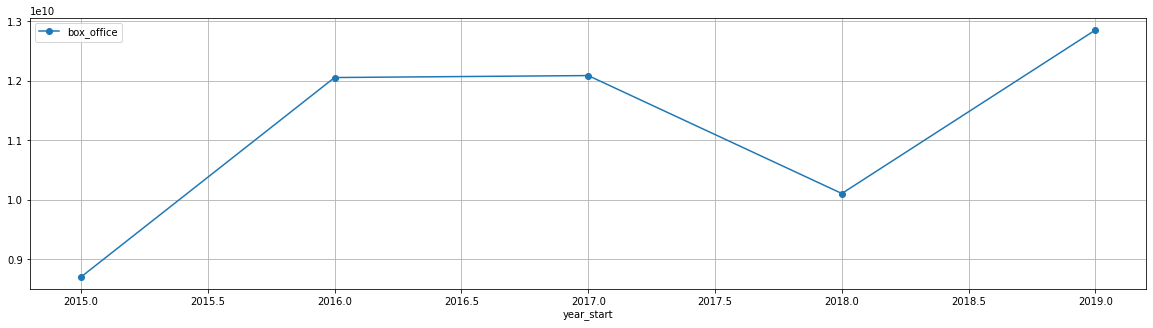

In [52]:
age_restriction_pivot12 = df.query('age_restriction == "«6+» - для детей старше 6 лет" \
and year_start >=2015').pivot_table(index='year_start', values='box_office', aggfunc='sum').reset_index()
age_restriction_pivot12.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Строю график зависимости сборов фильмов категории 12+ по годам**

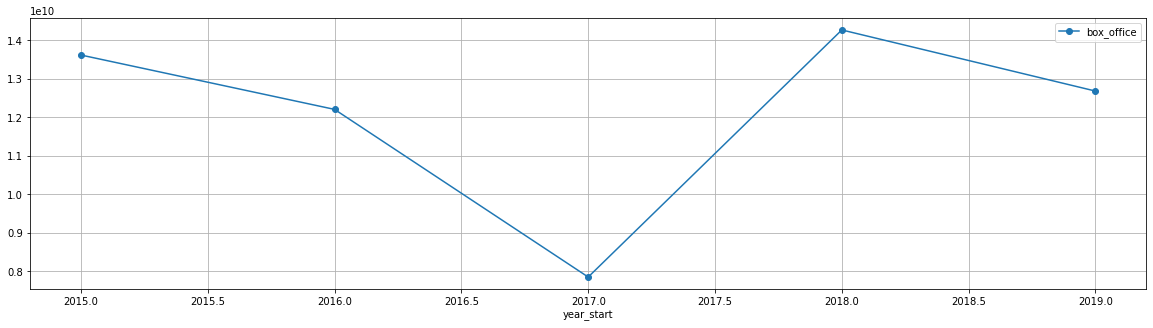

In [53]:
age_restriction_pivot12 = df.query('age_restriction == "«12+» - для детей старше 12 лет" \
and year_start >=2015').pivot_table(index='year_start', values='box_office', aggfunc='sum').reset_index()
age_restriction_pivot12.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Строю график зависимости сборов фильмов категории 16+ по годам**

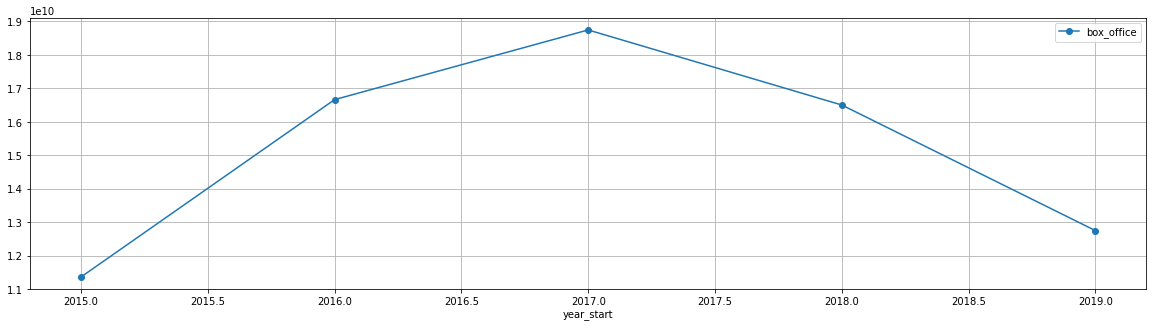

In [54]:
age_restriction_pivot12 = df.query('age_restriction == "«16+» - для детей старше 16 лет" \
and year_start >=2015').pivot_table(index='year_start', values='box_office', aggfunc='sum').reset_index()
age_restriction_pivot12.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Строю график зависимости сборов фильмов категории 18+ по годам**

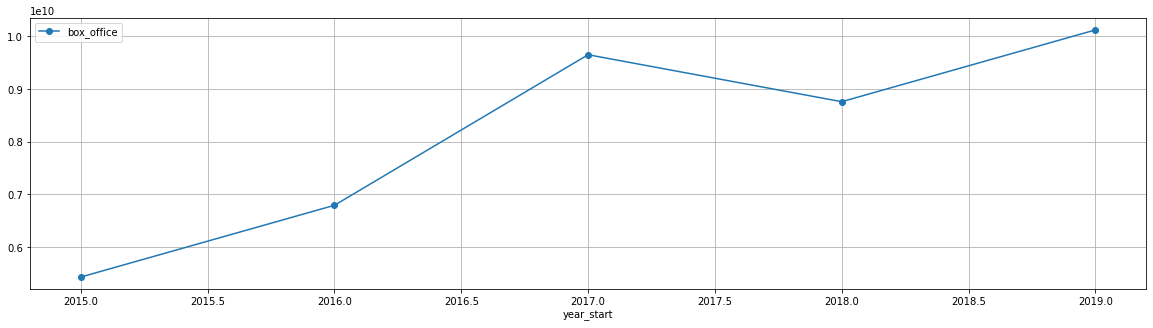

In [55]:
age_restriction_pivot12 = df.query('age_restriction == "«18+» - запрещено для детей" \
and year_start >=2015').pivot_table(index='year_start', values='box_office', aggfunc='sum').reset_index()
age_restriction_pivot12.plot(x='year_start', y='box_office', grid=True, figsize=(20, 5), style='o-')
None

**Фильмы категории 16+ оказались самыми выгодными в прокате.**\
Из года в год сильно меняется картинка зависимости сбора фильмов от возрастного ограничения аудитории.\
Могу предположить, что на результат влияет общее количество выпускаемых в году фильмов.\

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Считаю объем государственного финансирования фильмов по годам**

,year_start,sum_support
0,2010,0.00
1,2011,0.00
2,2012,0.00
3,2013,"134,347,945.00"
4,2014,"572,002,299.00"
5,2015,"3,656,241,459.00"
6,2016,"4,303,155,482.00"
7,2017,"3,183,971,662.00"
8,2018,"3,446,969,465.00"
9,2019,"4,904,000,000.00"


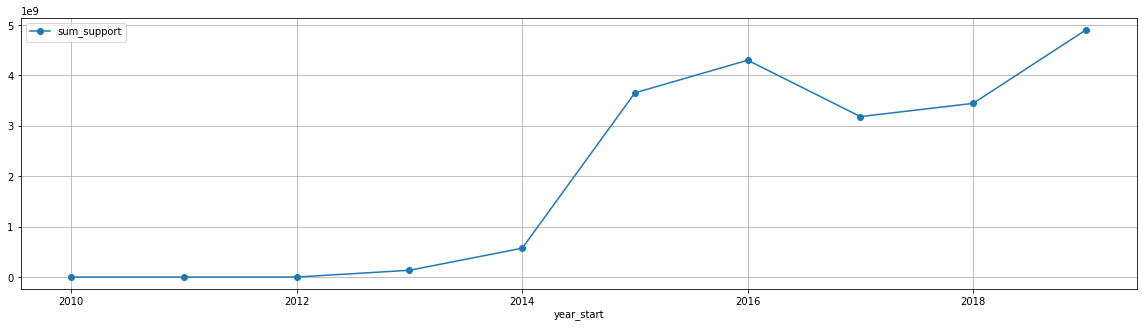

In [56]:
df['sum_support'] = df['refundable_support'] + df['nonrefundable_support']
sum_support_pivot = df.pivot_table(index='year_start', values='sum_support', aggfunc='sum').reset_index()
display (sum_support_pivot)
sum_support_pivot.plot(x='year_start', y='sum_support', grid=True, figsize=(20, 5), style='o-')
None

С 2015 года объем государственного финансирования фильмов стремительно растет.

**Смотрю как зависит объем государственного финансирования от возрастного ограничения аудитории. Фильмы для какой аудитории финансируют больше других**

,age_restriction,sum_support
0,«0+» - для любой зрительской аудитории,"183,520,000.00"
3,«18+» - запрещено для детей,"895,346,881.00"
2,«16+» - для детей старше 16 лет,"5,389,053,319.00"
4,«6+» - для детей старше 6 лет,"5,490,373,947.00"
1,«12+» - для детей старше 12 лет,"7,536,043,921.00"


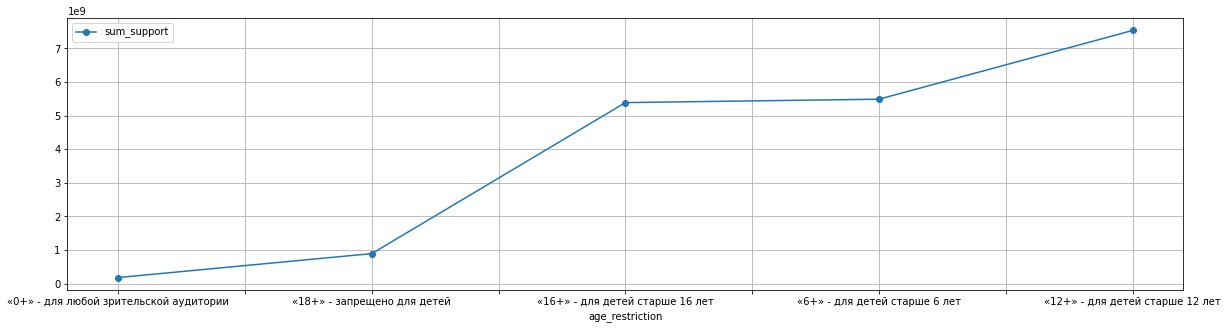

In [57]:
age_registration_support = df.query('year_start>=2015').pivot_table(index='age_restriction', \
                                                                    values='sum_support', aggfunc='sum').reset_index()
display (age_registration_support.sort_values(by='sum_support'))
ax = age_registration_support.sort_values(by='sum_support').plot(x='age_restriction', y='sum_support', \
                                                            grid=True, figsize=(20, 5), style='o-')
#age_restriction_pivot.plot(x='age_restriction', y='box_office', grid=True, figsize=(20, 5), style='o-', ax=ax)
None

Больше всего финансируют фильмы категории 12+

**Выделяю в отдельные датафреймы фильмы с господдержкой и фильмы без господдержки**

In [77]:
df_support_state = df.query('(refundable_support >0 or nonrefundable_support >0) \
and production_country=="Россия"') #фильмы с господдержкой
#display (df_support_state.head(5))
print ('Количество Российских фильмов c господдержкой', df_support_state['title'].count())

Количество Российских фильмов c господдержкой 316


In [78]:
df_non_support = df.query ('(refundable_support == 0 and \
nonrefundable_support == 0) and production_country=="Россия"') #Российские фильмы без господдержки
#display (df_non_support.head(5))
print ('Количество Российских фильмов без господдержки', df_non_support['title'].count())

Количество Российских фильмов без господдержки 1505


**Смотрю, насколько влияет господдержка на рейтинг фильмов**

In [79]:
ratings_pivot_support = df_support_state.pivot_table(index='ratings', values='sum_support', aggfunc='sum').reset_index()

In [80]:
ratings_pivot_support

,ratings,sum_support
0,9.00,"4,700,000.00"
1,9.40,"10,000,000.00"


Поскольку данных о рейтинге мало, то я не буду использовать рейтинг в качестве метрики успешности/не успешности фильма.

**Смотрю, насколько влияет господдержка на сборы фильмов**

- смотрю, как влияет господдержка на сборы российских фильмов

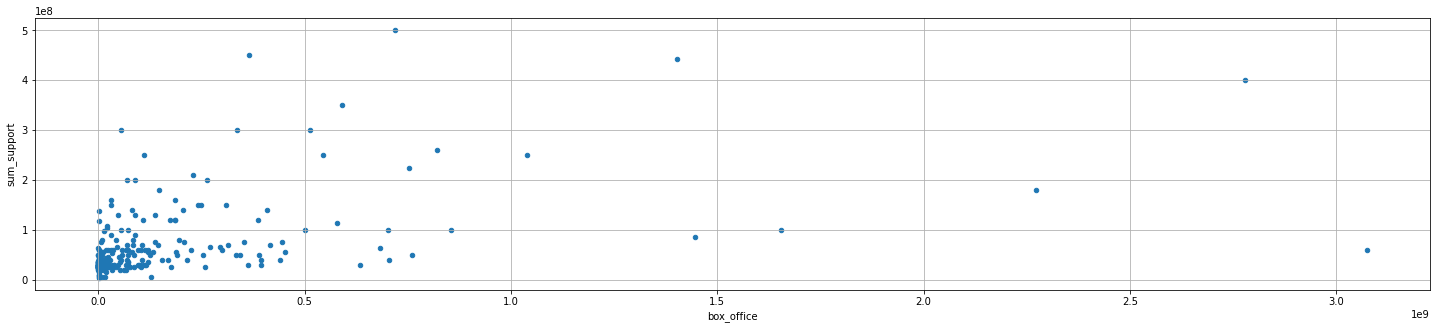

In [81]:
box_pivot_support = df_support_state.query('box_office > 0').pivot_table(index='box_office',\
                                                                         values='sum_support', \
                                                                         aggfunc='sum').reset_index()
#box_pivot_none_support = df_non_support.query('box_office > 0').pivot_table(index='box_office', values='sum_support', aggfunc='sum').reset_index()
box_pivot_support.plot(x='box_office', y='sum_support', kind='scatter', grid=True, figsize=(25, 5))
None

In [82]:
print ((box_pivot_support['box_office'].corr(box_pivot_support['sum_support'])))

0.4918256028733692


Зависимость между размером господдержки и сборами фильма умеренная

**Смотрю на сколько влияет господдержка на окупаемость фильмов**

,payback_%,sum_support
0,0.96,"138,969,465.00"
1,3.32,"59,000,000.00"
2,44.50,"23,000,000.00"
3,82.00,"180,000,000.00"
4,100.43,"70,000,000.00"
5,104.21,"80,000,000.00"
6,112.12,"45,000,000.00"
7,115.30,"160,000,000.00"
8,137.77,"40,000,000.00"
9,152.16,"70,000,000.00"


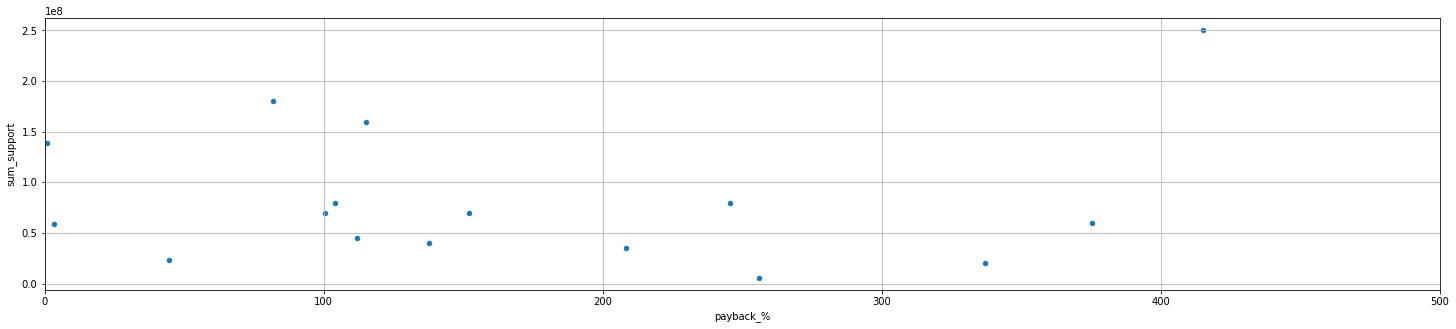

In [83]:
box_budget_pivot_support = df_support_state.query('box_office > 0 and budget >0').pivot_table(index='payback_%', \
                                                                        values='sum_support', \
                                                                        aggfunc='sum').reset_index()
display (box_budget_pivot_support.sort_values(by='payback_%'))
box_budget_pivot_support.plot(x='payback_%', y='sum_support', kind='scatter', grid=True, figsize=(25, 5), xlim=(0,500))
None

In [84]:
print ((box_budget_pivot_support['payback_%'].corr(box_budget_pivot_support['sum_support'])))

0.04997584281431707


Нет связи между окупаемостью фильмов с господдержкой и размером господдержки.

**Мне теперь интересно посмотреть, какие студии получают больше всех денег от государства**

In [85]:
producer_support = df.pivot_table(index='film_studio', values='sum_support', aggfunc='sum').reset_index()
producer_support.sort_values(by='sum_support', ascending=False).head(10)

,film_studio,sum_support
3177,"ООО ""Нон-Стоп Продакшн""","940,000,000.00"
3395,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""","842,104,482.00"
3469,"ООО ""ТаББаК""","744,000,000.00"
3427,"ООО ""Студия анимационного кино ""Мельница""","630,000,000.00"
2823,"ООО ""ВИЗАРТ ФИЛЬМ""","540,000,000.00"
1416,"ЗАО ""Дирекция кино""","500,000,000.00"
2790,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""","500,000,000.00"
3236,"ООО ""Продюсерская фирма Игоря Толстунова""","355,000,000.00"
3264,"ООО ""Продюсерский центр ИВАН""","350,000,000.00"
3120,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","330,000,000.00"


**И кто самый "поддерживаемый" режиссер**

In [86]:
director_support = df.pivot_table(index='director', values='sum_support', aggfunc='sum').reset_index()
director_support.sort_values(by='sum_support', ascending=False).head(10)

,director,sum_support
4274,Ф.Бондарчук,"750,000,000.00"
3092,Н.Хомерики,"660,000,000.00"
156,А.Кравчук,"500,000,000.00"
192,А.Мизгирев,"450,000,000.00"
3057,Н.Лебедев,"442,104,482.00"
187,А.Мегердичев,"400,000,000.00"
3478,Р.Давлетьяров,"352,000,000.00"
1186,Д.Дьяченко,"351,000,000.00"
2124,И.Шурховецкий,"350,000,000.00"
3694,С.Андреасян,"325,000,000.00"


### Шаг 5. Напишите общий вывод

Задачей проекта было изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.
\
Меньше всего фильмов выходило в 2017 году, а больше всего - в 2010 году.\
\
Информация о сборах фильма есть у 41.86 % фильмов\
\
Минимальная сумма сборов была в 2010 году, а максимальная - в 2018 году.\
\
Пик сборов за фильмы произошел в 2017 году и с тех пор плавно снижается.\
\
Из года в год сильно меняется картинка зависимости сбора фильмов от возрастного ограничения аудитории.\
Могу предположить, что на результат влияет общее количество выпускаемых в году фильмов.\
Наибольший размер сборов собрали фильмы с возрастным ограничением 16+.\
\
\
С 2015 года объем государственного финансирования фильмов стремительно растет.\
\
Поскольку данных о рейтинге фильмов с господдержкой мало, то я не буду использовать рейтинг как метрику успешности/не успешности фильмов с господдержкой.\
\
Зависимость между суммой сборов с фильма и размеров государственного финансирования фильмов умеренная.\
\
Нет связи между размером господдержки фильмов и их окупаемостью.\
\
**Вывод: зрителям не сильно интересны фильмы с государственным финансированием. Размер гос финансирования не влияет на  окупаемость фильма. Но есть небольшая связь между размером гос финансирования и сборами с фильма. Чем больше размер государственного финансирования, тем выше сборы.\
\
Самые большие сборы приносят фильмы с возрастным ограничением 16+, в то время как, на первом месте в плане размера государственного финансирования являются фильмы с рейтингом 12+.**